<a href="https://colab.research.google.com/github/AlirezPa/MLZNU03/blob/main/SSE/ML_Ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ترسیم و برش های مقطعی
برای SSE


In [100]:

import numpy as np
import matplotlib.pyplot as plt


In [131]:
# generate  data
n = 100
noise=3

np.random.seed(42)
x = np.linspace(0, 20, n)
# Ax + B
# 3X + 5

A = 3
B = 5
noise = np.random.randn(n) * noise
y = A * x + B + noise

print(x,y)

[ 0.          0.2020202   0.4040404   0.60606061  0.80808081  1.01010101
  1.21212121  1.41414141  1.61616162  1.81818182  2.02020202  2.22222222
  2.42424242  2.62626263  2.82828283  3.03030303  3.23232323  3.43434343
  3.63636364  3.83838384  4.04040404  4.24242424  4.44444444  4.64646465
  4.84848485  5.05050505  5.25252525  5.45454545  5.65656566  5.85858586
  6.06060606  6.26262626  6.46464646  6.66666667  6.86868687  7.07070707
  7.27272727  7.47474747  7.67676768  7.87878788  8.08080808  8.28282828
  8.48484848  8.68686869  8.88888889  9.09090909  9.29292929  9.49494949
  9.6969697   9.8989899  10.1010101  10.3030303  10.50505051 10.70707071
 10.90909091 11.11111111 11.31313131 11.51515152 11.71717172 11.91919192
 12.12121212 12.32323232 12.52525253 12.72727273 12.92929293 13.13131313
 13.33333333 13.53535354 13.73737374 13.93939394 14.14141414 14.34343434
 14.54545455 14.74747475 14.94949495 15.15151515 15.35353535 15.55555556
 15.75757576 15.95959596 16.16161616 16.36363636 16

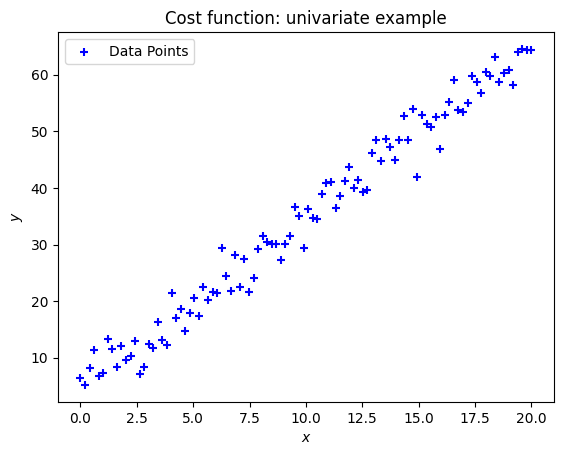

In [132]:

plt.scatter(x, y, color='blue', label='Data Points',marker="+")
plt.title("Cost function: univariate example")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

In [133]:
# X= Sum(x)
# Y = Sum(y)
#  W0 = (Y - W1 * X ) / n
#  W1 = (n*sum(x*y)- XY) /(n sum(x^2) - X^2)

X = x.sum()
Y = y.sum()
XiYi = (x * y).sum()
Xi2 = (x**2).sum()

print(n,X,Y,XiYi,Xi2)


100 1000.0 3468.846044781772 44960.840245848136 13400.6734006734


In [137]:
W1 = (n * XiYi - X * Y) / (n * Xi2 - X**2)

W0 = (Y - W1 * X) / n


print(f"Parameters (w): ")
print(f"w_1 = {W1}, w_0 = {W0}")


Parameters (w): 
w_1 = 3.020689901004985, w_0 = 4.481561437767873


In [136]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x

# Linear Regression using closed-form solution
def linear_regression_closed_form(X, y):
    # Adding bias term (x_0 = 1) to input vector X
    X_b = np.c_[np.ones((len(X), 1)), X]  # X_b is now the full input vector with bias term
    # Closed-form solution: w = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w

# Get parameter vector w
w = linear_regression_closed_form(x, y)
print(f"Parameters (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")


Parameters (w): 
w_1 = 3.02, w_0 = 4.48


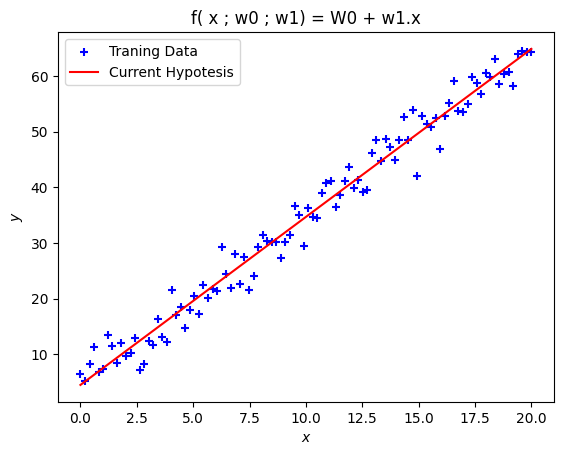

In [139]:
y_pred = h_w(x, w)

plt.scatter(x, y, color='blue', label='Traning Data',marker="+")
plt.plot(x, y_pred, color='red', label='Current Hypotesis')
plt.title("f( x ; w0 ; w1) = W0 + w1.x")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

In [140]:
# define the MSE
def mse_cost(predict , target):
  N = predict.shape[0]
  diff = predict.ravel() - target.ravel()
  cost = np.dot(diff,diff.T)/(2*N)
  return cost


In [141]:
#define the predict for simple linear model
def LinearModel(thetas , X):
  # normalize add biass term
  X = (X-X.mean())/X.std()
  X = np.hstack((X,np.ones((X.shape[0],1),dtype=X.dtype)))
  return np.dot(X,thetas)

In [157]:
# init data structures

dy= y.reshape(-1,1)
dx= x.reshape(-1,1)


In [153]:
# grid search over "all" possible theta values and compute cost
start, end, step = -200, 200, 5
thetas_0, thetas_1 = np.arange(start, end, step), np.arange(start, end, step)

# loop over the all the parameter pairs and create a list of all possible pairs
thetas_lst = []
for theta_0 in thetas_0:
    for theta_1 in thetas_1:
        thetas_lst.append(np.array([theta_0, theta_1]).reshape(-1, 1))

linear_cost_lst = []
for thetas in thetas_lst:
    # get prediction from our model
    pred_linear = LinearModel(thetas, dx)
    # keep track of the cast per parameter pairs
    linear_cost_lst.append(mse_cost(pred_linear, dy))

In [154]:
# arrange the costs back to a square matrix grid
axis_length = len(np.arange(start, end, step))
linear_cost_matrix = np.array(linear_cost_lst).reshape(axis_length, axis_length)

In [155]:
linear_cost_matrix[0]


array([51221.20050881, 50060.25820657, 48924.31590433, 47813.37360209,
       46727.43129985, 45666.48899761, 44630.54669537, 43619.60439313,
       42633.6620909 , 41672.71978866, 40736.77748642, 39825.83518418,
       38939.89288194, 38078.9505797 , 37243.00827746, 36432.06597522,
       35646.12367298, 34885.18137074, 34149.2390685 , 33438.29676627,
       32752.35446403, 32091.41216179, 31455.46985955, 30844.52755731,
       30258.58525507, 29697.64295283, 29161.70065059, 28650.75834835,
       28164.81604611, 27703.87374387, 27267.93144164, 26856.9891394 ,
       26471.04683716, 26110.10453492, 25774.16223268, 25463.21993044,
       25177.2776282 , 24916.33532596, 24680.39302372, 24469.45072148,
       24283.50841924, 24122.56611701, 23986.62381477, 23875.68151253,
       23789.73921029, 23728.79690805, 23692.85460581, 23681.91230357,
       23695.97000133, 23735.02769909, 23799.08539685, 23888.14309461,
       24002.20079238, 24141.25849014, 24305.3161879 , 24494.37388566,
      

In [156]:
import plotly.graph_objects as go

# plot the surface plot with plotly's Surface
fig = go.Figure(data=go.Surface(z=linear_cost_matrix,
                                x=thetas_0,
                                y=thetas_1))

# add a countour plot
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

# annotate the plot
fig.update_layout(title='Linear Model MSE Cost Surface',
                  scene=dict(
                    xaxis_title='theta_0 (intercept)',
                    yaxis_title='theta_1 (slope)',
                    zaxis_title='MSE Cost'),
                  width=700, height=700)

fig.show()